## Exercise 2

In this exercise, we will predict the two income classes in the adult dataset (The file "adult.csv" is also on Moodle). 

Answer the following questions:
1. Clean the `income` variable such that it has only two values
2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.
3. Create X and y dataset and split the datasets into training and testing sets
4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 
5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.
6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier



In [47]:
df = pd.read_csv("adult.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### 1 Clean the `income` variable such that it has only two values

df['income'].unique()

we see that we have a prolem with the "." so we rome it so we only have 2 values.

In [48]:
df['income'] = df['income'].str.replace(r'\.$', '', regex=True)

In [49]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

### 2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.

I want to check age and education level.
'education-num': assumption that higher education rewards higher paying jobs
'age': that older people have more work experience and therefor are qualified for higher paying jobs

lets check these features and see if they need cleaning


In [50]:
print(df['education-num'].isnull().sum())
print(df['age'].isnull().sum())


0
0


In [51]:
df['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

In [52]:
df['age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


looks fine

In [54]:

income_features = ['age', 'education-num']

scaler = MinMaxScaler()

df[income_features] = scaler.fit_transform(df[income_features])
print(df[income_features].head())

        age  education-num
0  0.301370       0.800000
1  0.452055       0.800000
2  0.287671       0.533333
3  0.493151       0.400000
4  0.150685       0.800000


### 3. Create X and y dataset and split the datasets into training and testing sets

we have our features from our previous encoding (features: 'age' and one-hot encoded 'education')

In [55]:

X = df[income_features]  
y = df['income'].map({'<=50K': 0, '>50K': 1})

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


    ### 4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks

Lets try out some differint k's

In [56]:
errors = []

# Loop over k values from 1 to 20
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)

In [57]:
errors

[0.28273108813594017,
 0.2432183437404033,
 0.2557068277203398,
 0.23533626778585326,
 0.23451735080356229,
 0.2254068993755758,
 0.22356433616542126,
 0.2238714300337803,
 0.22305251305148943,
 0.22284778380591663,
 0.22704473334015762,
 0.22438325314771213,
 0.2236667007882076,
 0.22059576210461662,
 0.22213123144641211,
 0.21865083427167575,
 0.21691063568430746,
 0.21926502200839393,
 0.21783191728938478,
 0.21813901115774392]

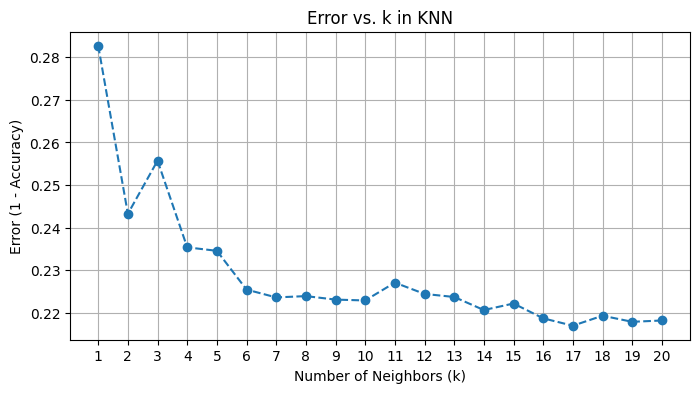

In [58]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 21), errors, marker='o', linestyle='--')
plt.title('Error vs. k in KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error (1 - Accuracy)')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

The results show that KNN reaches its highest accuracy (about 78.3%) at k=17, with performance ranging from roughly 71.9% to 78.3% across all tested k values. As k increases from 1 to around 17, the model benefits from additional smoothing, then begins to level off. We therefore select k=17 for our final model. Overall, KNN demonstrates consistent performance for predicting income with the chosen features, though performance does vary slightly based on k.

let take a look 

In [59]:
knn17 = KNeighborsClassifier(n_neighbors=17)
knn17.fit(X_train, y_train)
y_pred_knn17 = knn17.predict(X_test)
knn17_accuracy = accuracy_score(y_test, y_pred_knn17)
print("KNN (k=17) Test Accuracy:", knn17_accuracy)

KNN (k=17) Test Accuracy: 0.7830893643156925


In [60]:
confusion_matrix(y_test, y_pred_knn17)

array([[6808,  623],
       [1496,  842]])

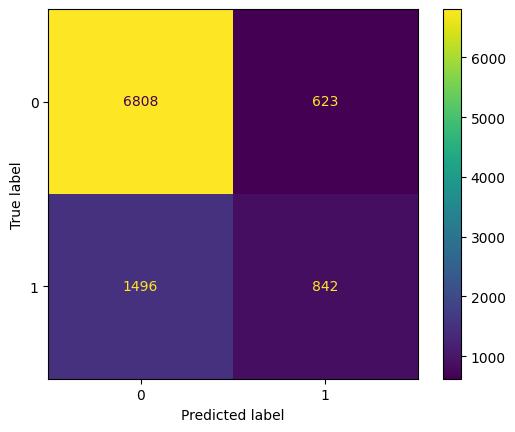

In [61]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn17)).plot()

The confusion matrix shows that out of all predictions, 6808 instances were correctly identified as “<=50K” (true negatives), while 623 instances were incorrectly predicted as “>50K” when they were actually “<=50K” (false positives). On the other hand, 1496 instances were wrongly classified as “<=50K” despite actually being “>50K” (false negatives), and 842 instances were correctly predicted as “>50K”

### 5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.

In [62]:

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the test set using logistic regression
y_pred_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Test Accuracy:", logreg_accuracy)

Logistic Regression Test Accuracy: 0.782679905824547


It looks like the logistic regression classifier did slightly better than our KNN=17, but its so close so i would say its on par. 0.782679905824547 vs  0.7821680827106152

lets take look at the confuisson matrix to see what kind of mistakes it makes compared to the knn.

[[6999  432]
 [1691  647]]


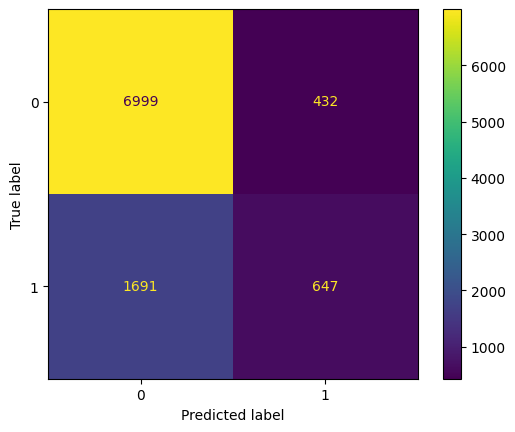

In [63]:
# Compute the confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Create a ConfusionMatrixDisplay instance and plot it
ConfusionMatrixDisplay(confusion_matrix=cm_logreg).plot()


print(cm_logreg)

comparison of Logistic Regression vs. KNN (k=17):

logistic regression minimizes false positives (better at identifying lower-income individuals), while KNN (k=17) detects more high-income individuals, at the expense of more false positives. The best choice depends on whether you prioritize minimizing false negatives or false positives.

### 6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

In [64]:
# Train the decision tree on the training set
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict on the test set
y_pred_dtree = dtree.predict(X_test)



In [65]:
# Evaluate the model
dtree_accuracy = accuracy_score(y_test, y_pred_dtree)
print("Decision Tree Test Accuracy:", dtree_accuracy)

Decision Tree Test Accuracy: 0.7903572525335244


In [66]:
# Confusion Matrix
cm_dtree = confusion_matrix(y_test, y_pred_dtree)
print("Confusion Matrix - Decision Tree:")
print(cm_dtree)

Confusion Matrix - Decision Tree:
[[6897  534]
 [1514  824]]


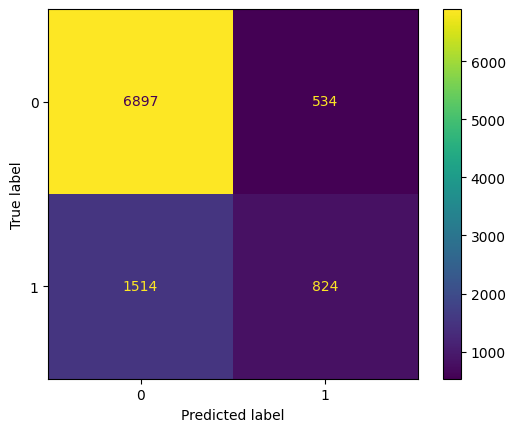

In [67]:
ConfusionMatrixDisplay(cm_dtree).plot()

The decision tree achieves 79.0% accuracy, correctly classifying 6,897 “≤50K” individuals (true negatives) and 824 “>50K” individuals (true positives). It mislabels 534 “≤50K” individuals (false positives) and 1,514 “>50K” individuals (false negatives). it has the highest Accuracy: 0.7903572525335244 so far.

### 7 Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

In [68]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Test Accuracy:", rf_accuracy)

Random Forest Test Accuracy: 0.7903572525335244


In [69]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix - Random Forest:")
print(cm_rf)


Confusion Matrix - Random Forest:
[[6889  542]
 [1506  832]]


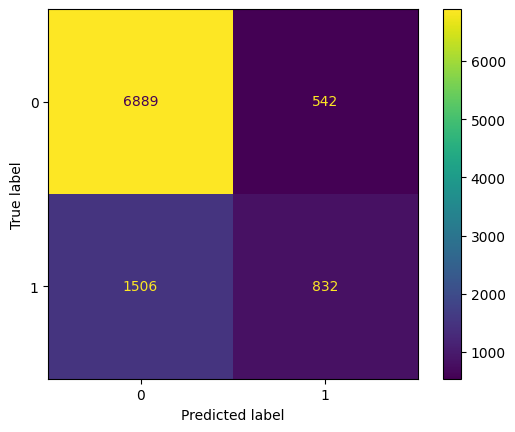

In [70]:
ConfusionMatrixDisplay(cm_rf).plot()

these results are very simmilar to the priors 

### 8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

In [71]:
# Train an AdaBoost classifier on the training set (using 50 estimators by default)
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)

# Predict on the test set
y_pred_ada = ada.predict(X_test)
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print("AdaBoost Test Accuracy:", ada_accuracy)

AdaBoost Test Accuracy: 0.7929163681031836


with a test accuracy of 0.7903572525335244 it has the highest out of the classiferes we have tested

In [72]:
cm_ada = confusion_matrix(y_test, y_pred_ada)
print("Confusion Matrix - AdaBoost:")
print(cm_ada)

Confusion Matrix - AdaBoost:
[[6724  707]
 [1316 1022]]


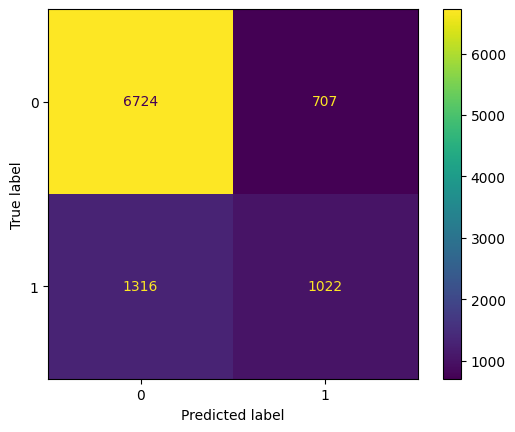

In [73]:
ConfusionMatrixDisplay(cm_ada).plot()